Using device: cpu
Generator model loaded successfully!


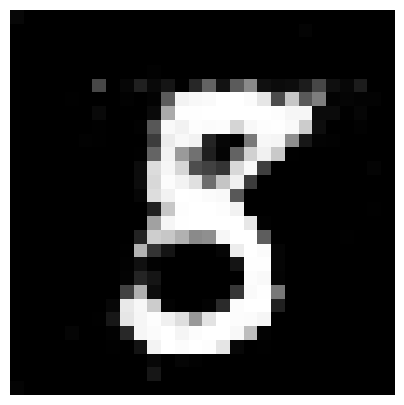

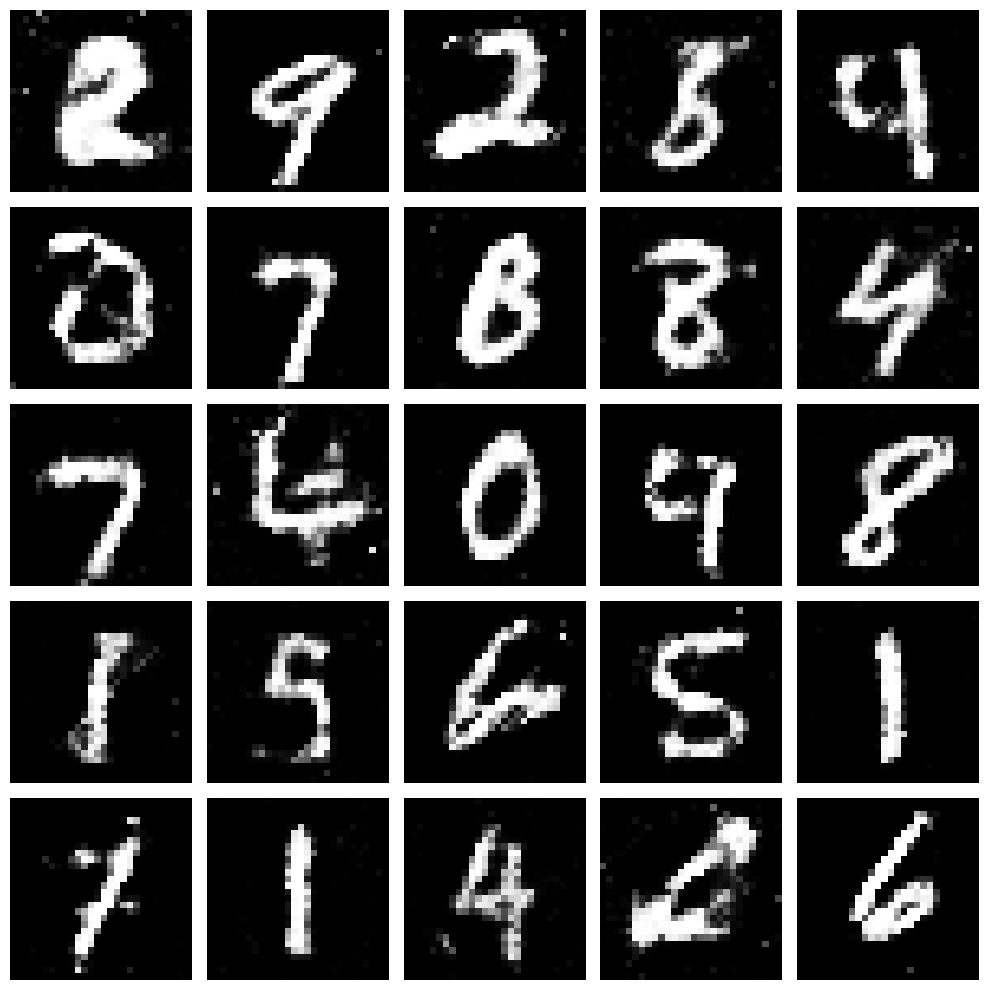

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the Generator class (must match the architecture used during training)
class Generator(nn.Module):
    def __init__(self, latent_dim=100, output_dim=784):
        super(Generator, self).__init__()
        
        # Architecture with batch normalization and LeakyReLU
        self.model = nn.Sequential(
            # First layer
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Second layer
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Third layer
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Final layer
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, z):
        img = self.model(z)
        return img

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize the generator
latent_dim = 100
generator = Generator(latent_dim=latent_dim).to(device)

# Load the trained model weights
try:
    generator.load_state_dict(torch.load('g.pth', map_location=device))
    print("Generator model loaded successfully!")
except FileNotFoundError:
    print("Model file not found. Make sure 'g.pth' exists in the current directory.")
    exit(1)

# Set generator to evaluation mode
generator.eval()

# Generate random noise
noise = torch.randn(100, latent_dim, device=device)

# Generate images
with torch.no_grad():  # No need to track gradients
    generated_images = generator(noise).detach().cpu()

# Reshape to 28x28 images
generated_images = generated_images.view(100, 28, 28).numpy()

# Display one specific image (similar to the TensorFlow example)
plt.figure(figsize=(5, 5))
plt.imshow(generated_images[66], cmap='gray', interpolation="nearest")
plt.axis("off")
plt.savefig('generated_digit.png')  # Save the image
plt.show()

# Display a grid of generated images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(generated_images[i], cmap='gray', interpolation="nearest")
    plt.axis("off")
plt.tight_layout()
plt.savefig('generated_digits_grid.png')  # Save the grid
plt.show()
